In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化后数据集合.xlsx')
label1 = np.array(features['失效反向数'])/2  # 将每个值除以2
features = features.drop(['失效反向数'], axis=1)
label1 = np.log(label1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=145, epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

10折交叉验证平均R2值: 0.86
10折交叉验证平均MAPE值: 9.09


In [2]:
# 读取新数据
new_data = pd.read_excel('实验验证数据库.xlsx')

# 提取特征和标签
new_features = new_data.drop(['疲劳寿命'], axis=1)
new_label = np.array(new_data['疲劳寿命'])
new_label = np.log(new_label)
# 预测
new_predictions = model_svr.predict(new_features)

# 计算评价指标
mape_new_data = mape_function(new_predictions, new_label)
# 输出结果
print(f'MAPE on new data: {mape_new_data:.2f}')

MAPE on new data: 15.06


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [3]:
new_label 

array([10.02167051, 10.30781868,  8.3035048 , 10.44935208,  7.7380523 ,
        7.82324569,  7.65159557,  8.52198171,  9.52134827,  8.15162165,
        7.69393733])

In [4]:
new_predictions

array([7.32425249, 7.32425249, 7.32425249, 7.32425249, 7.32425249,
       7.32425249, 7.32425249, 7.32425249, 7.32425249, 7.32425249,
       7.32425249])

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


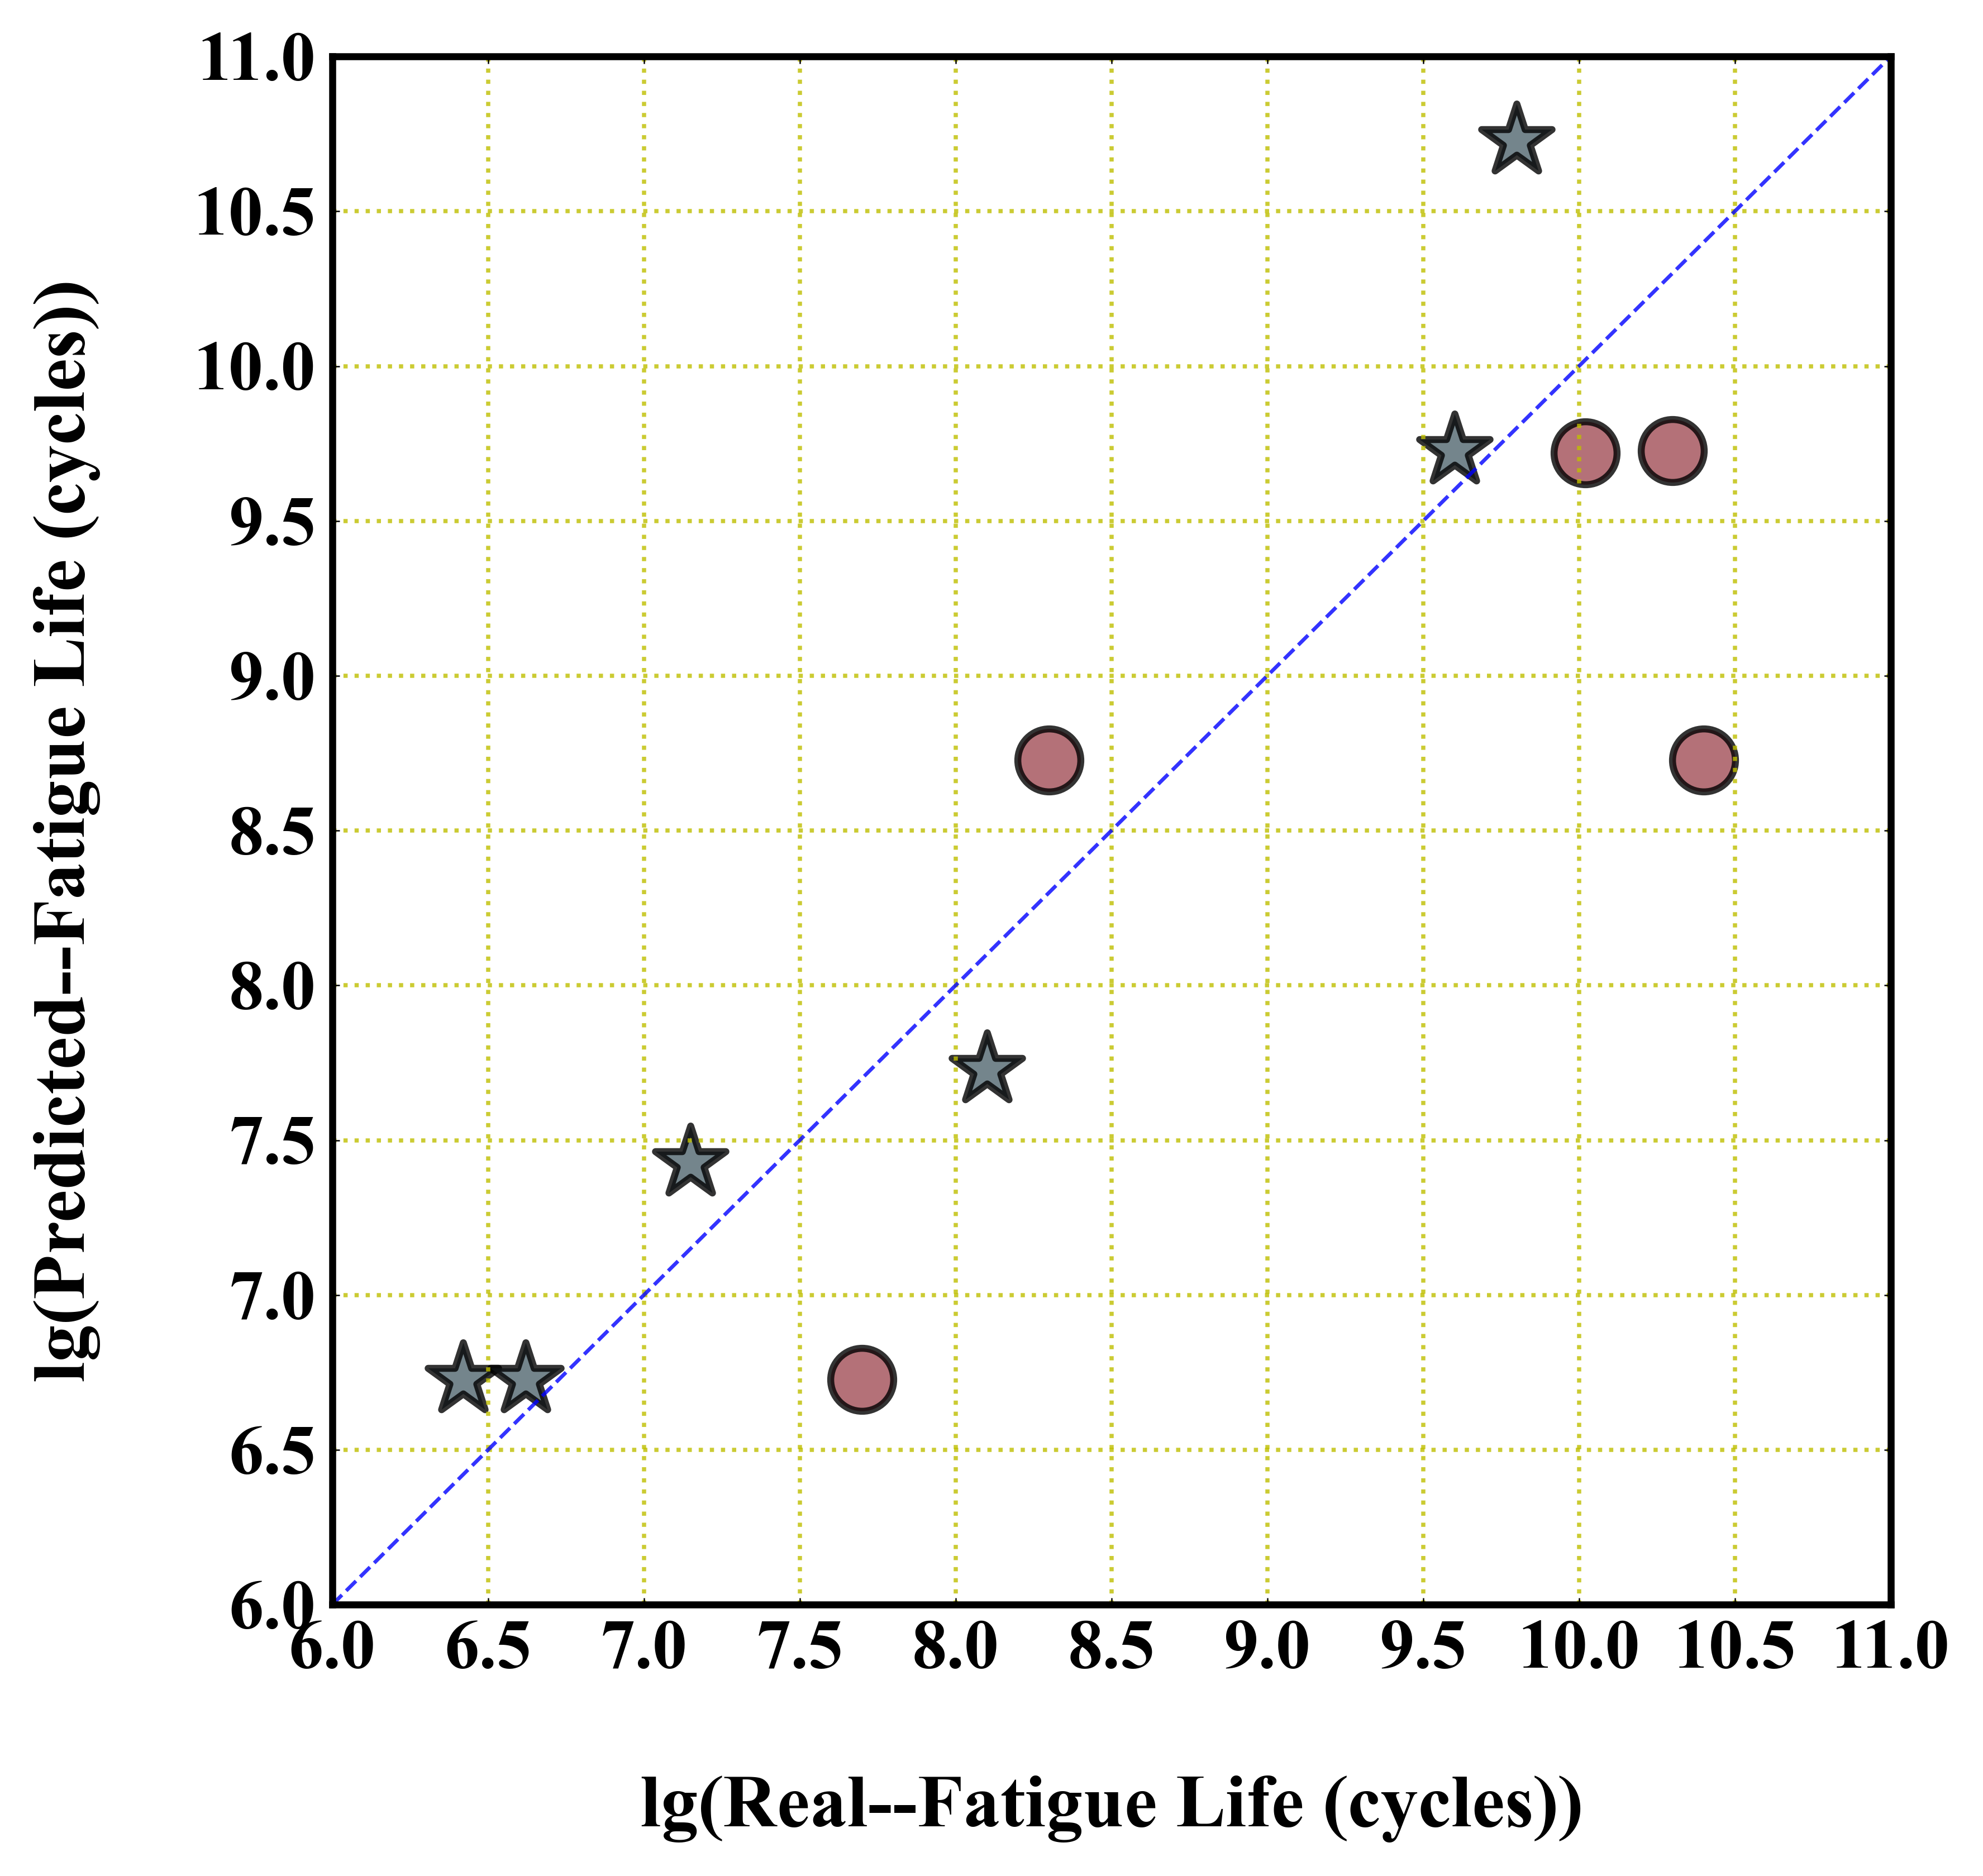

In [9]:
new_label =[10.02, 10.3,  8.3 , 10.4,  7.7 ,
        ]
new_predictions=[9.72, 9.72743906, 8.72743906, 8.72743906, 6.72743906,
       ]
new_predictions1=[
       10.72743906, 7.72743906,
       9.72743906,6.72743906, 7.42743906,
       6.72743906,]
new_label1=[
       9.8,  8.1,
        9.6,6.42,7.15,6.62  ]
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
# Set plot parameters
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

# Customize plot borders
ax = plt.axes()
ax.set_facecolor("white")
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

# Set ticks
new_ticks = list(np.arange(6, 11.1, 0.5))
plt.xticks(new_ticks, fontsize=15, weight='bold', fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=15, weight='bold', fontname='Times New Roman')

# Scatter plot
plt.scatter(new_label, new_predictions, alpha=0.8, s=183, linewidths=1.5, c='#A24D56',
            edgecolor='#000000', marker='o')
plt.scatter(new_label1, new_predictions1, alpha=0.8, s=253, linewidths=1.5, c='#516770',
            edgecolor='#000000', marker='*')

# Plot lines
plt.plot([6, 11], [6, 11], 'b--', linewidth='0.8', alpha=0.8)

# Set limits
plt.ylim(6, 11)
plt.xlim(6, 11)

plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel(r'lg(Real--Fatigue Life (cycles))', size=16, weight='bold', labelpad=20, fontname='Times New Roman')
plt.ylabel(r'lg(Predicted--Fatigue Life (cycles))', size=16, weight='bold', labelpad=20, fontname='Times New Roman')
#plt.text(1620, 200, 'SVR', fontsize=20, weight='bold', fontname='Times New Roman')  # Add text
plt.show()

In [8]:
import numpy as np

new_label =[10.02, 10.3,  8.3 , 10.4,  7.7 ,
        7.8,  7.6,  8.5,  9.8,  8.1,
        9.6]
new_predictions=[9.72, 9.72743906, 8.72743906, 8.72743906, 6.72743906,
       8.72743906, 7.72743906, 8.72743906, 10.72743906, 7.72743906,
       9.72743906]

def mape_function(predicted, actual):
    predicted = np.array(predicted)
    actual = np.array(actual)
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

mape = mape_function(new_predictions, new_label)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

10折交叉验证平均MAPE值: 6.73


In [3]:
import numpy as np
a=np.log(620)

In [4]:
a

6.429719478039138

In [5]:
b=np.log(1286)

In [6]:
b

7.1592919047975645

In [7]:
c=np.log(755)

In [8]:
c

6.626717749249025